In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
#loading the players' data set
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57


In [4]:
#wrangling the data into more applicable use for this project
players_data <- players |>
    select(subscribe, played_hours, Age)|> #selecting only columns we need for this project, subscribe, played_hours, Age
    filter(Age <= 40, played_hours <= 30, played_hours > 0)|> #removing outliers for Age and played_hours to prevent inflation of results, removing all inactive players (played_hours >0)
    mutate(subscribe = factor(subscribe, levels = c(TRUE, FALSE), labels = c("true", "false")))  #changing all logical to factors so that classification method can be done
players_data

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
true,3.8,17
true,0.7,21
true,0.1,21
true,1.6,23
true,1.5,25
⋮,⋮,⋮
false,0.2,17
false,1.7,17
false,0.1,18


In [5]:
#summary statistics of the data (quantative), once it has been wrangled
summary_table <- players_data |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE), median_played_hours = median(played_hours, na.rm = TRUE),
    median_age = median(Age, na.rm = TRUE), sd_played_hours = sd(played_hours, na.rm = TRUE),
    sd_age = sd(Age, na.rm = TRUE))

summary_table

minmax_table <- players_data |>
    summarize(max_played_hours = max(played_hours, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE), min_played_hours = min(played_hours, na.rm = TRUE),
    min_age = min(Age, na.rm = TRUE))

minmax_table 

mean_played_hours,mean_age,median_played_hours,median_age,sd_played_hours,sd_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.434737,20.2,0.4,19,3.316361,4.741398


max_played_hours,max_age,min_played_hours,min_age
<dbl>,<dbl>,<dbl>,<dbl>
23.7,38,0.1,10


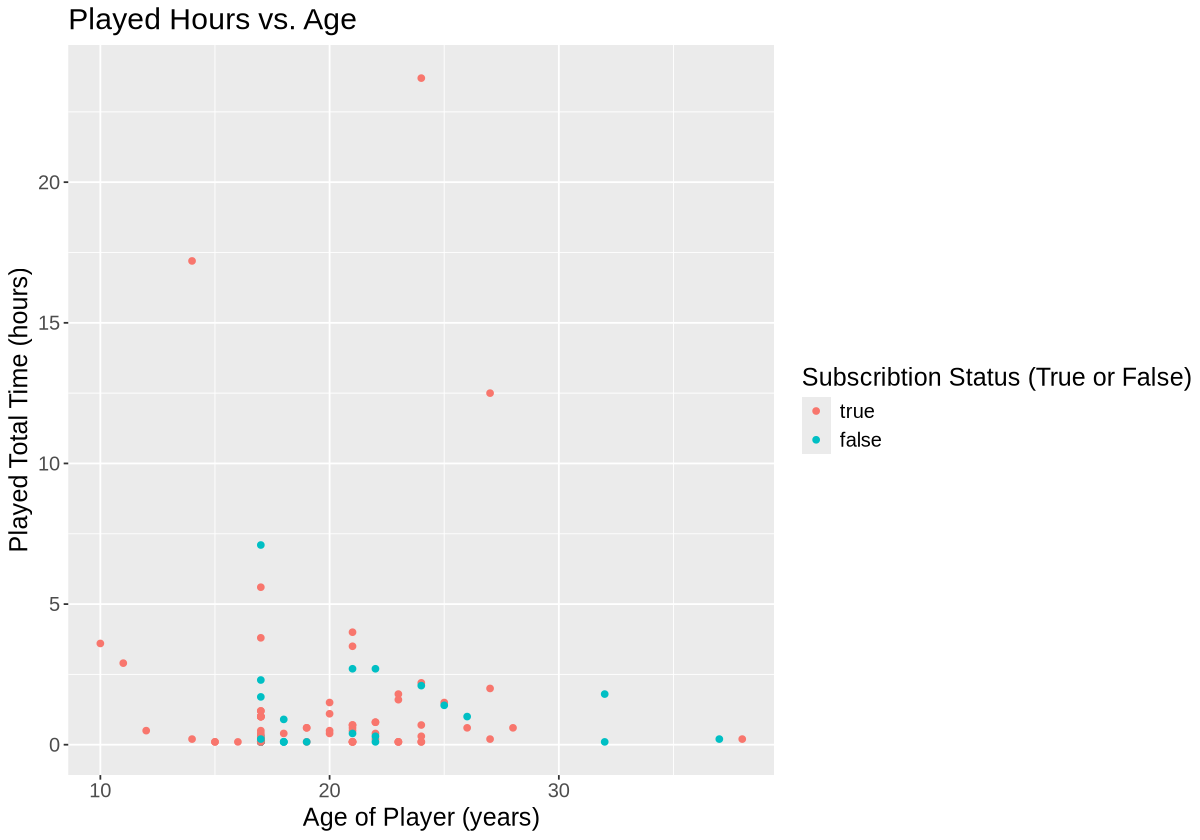

In [8]:
#visualization of the data
options(repr.plot.height = 7, repr.plot.width = 10)
players_plot <- players_data|>
    ggplot(aes(x=Age, y=played_hours, color=subscribe))+
    geom_point()+
    labs(x="Age of Player (years)", y="Played Total Time (hours)", color="Subscribtion Status (True or False)")+
    ggtitle("Played Hours vs. Age")+
    theme(text = element_text(size = 15))
players_plot

This is the visualization of the exploratory portion of the question "Can a player's hours played, and age predict the players subscription state?". There is no strong correlation (positive or negative) in the relationship between played hours and age of player (Ie. increase of age does not seem to increase the hours played in the game). The total playtime is generally stagnat around 0-5 hours (not including 0 as those are inactive players) across all ages 10-40 years old. The players are more populated around ages 11-28years old. The subscription pattern seems to increase upon increase in age (above around 17) and increase in game play (more "true" subscription, as the played time increases, highest values have all "true" values

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


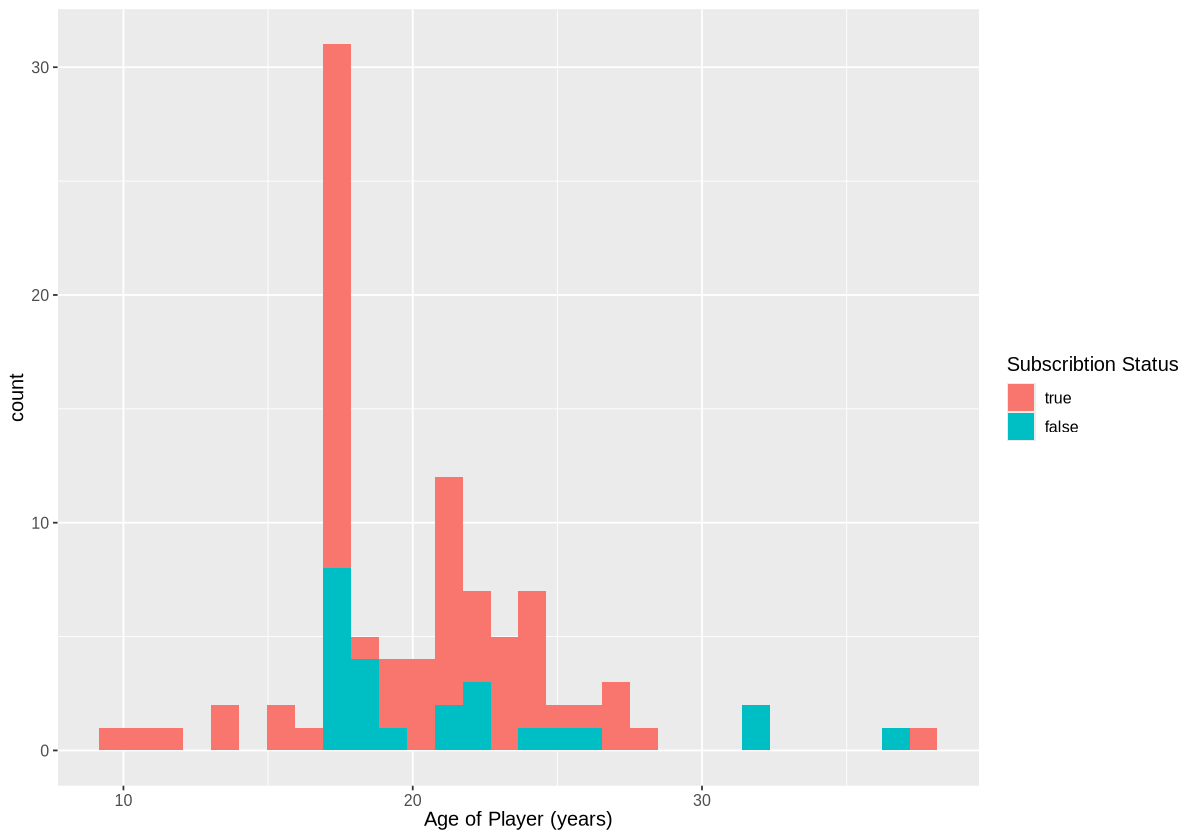

In [10]:
options(repr.plot.height = 7, repr.plot.width = 10)
age_distribution <- players_data|>
    ggplot(aes(x=Age, fill = subscribe))+
    geom_histogram() +
    labs(x = "Age of Player (years)", fill = "Subscribtion Status") +
    theme(text = element_text(size = 12))
age_distribution

This is the visualization of the distribution of age in the data set players.csv. It could have followed a bell curve, however there is a disproportional peak at age = 17, showing that there is a clear sample bias and this data is not as representative of the general population.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


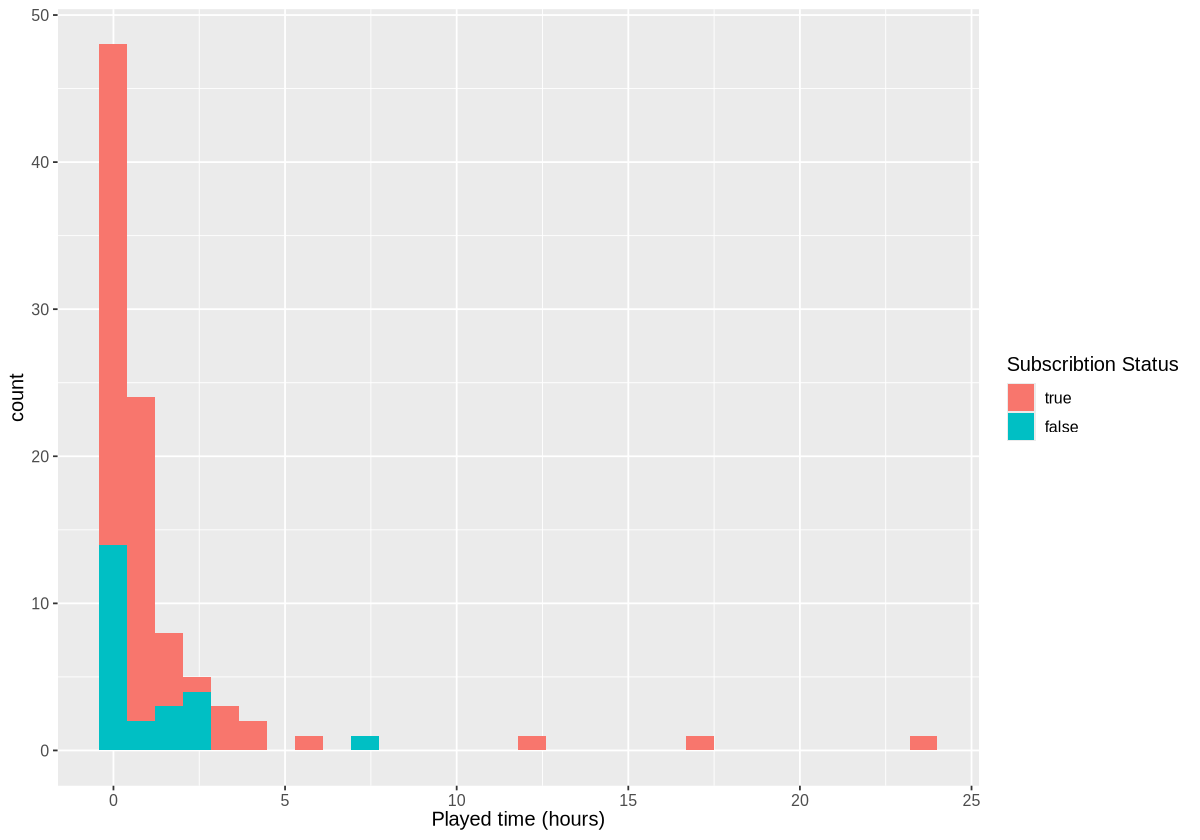

In [11]:
options(repr.plot.height = 7, repr.plot.width = 10)
hours_distribution <- players_data|>
    ggplot(aes(x=played_hours, fill = subscribe))+
    geom_histogram() +
    labs(x = "Played time (hours)", fill = "Subscribtion Status") +
    theme(text = element_text(size = 12))
hours_distribution

Played time is positively skewed with the peak at around 0.1hours. 

In [12]:
#splitting data into test and training sets, make 75% training data and 25% testing, strata is subscribe as that is the response value
players_split <- initial_split(players_data, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

#create a recipe using the training data, preprocess and standardize the quantitative predictors
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_data) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

#create the classifier model and then implement both model and recipe into workflow to fit
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3239437
Best kernel: rectangular
Best k: 3

In [13]:
#test the classifier using testing set
players_test_predictions <- predict(knn_fit, players_test) |>
    bind_cols(players_test)

players_test_predictions

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
true,true,0.1,21
false,false,0.1,18
true,true,0.6,26
true,false,1.4,25
false,true,0.1,17
⋮,⋮,⋮,⋮
true,false,1.8,32
true,true,0.4,17
false,true,0.1,17


In [18]:
#examine the accuracy of the classifier from test set predictions
#accuracy of the classifer examining
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |> #specify truth = subscribe to see all CORRECT subscribed predictions and estimate = .pred_class for the predicted subscriptions
  filter(.metric == "accuracy")
#we have a 63% accuracy

#examine the precision and recall
players_test_predictions |> pull(subscribe) |> levels() #look at the levels of the players

#true is the first level, so indicate this when looking at precision
players_test_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "first")
#we have 73% precision

#look at recall with the same indicated "true" as the first level
players_test_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "first")
#we have 78% recall


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5416667


[1] "true"  "false"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7058824


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6666667


In [17]:
confusion <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion
#classified 4 subscription statuses as false when they were true
#classified 5 subscription statuses as true when they were false
#14 correct true subscription predictions
#1 correct false subscription predictions

          Truth
Prediction true false
     true    12     5
     false    6     1